In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [166]:
#Importing scraped data into dataframe
company_data = pd.read_csv("/Users/harigupta/Desktop/Data_science_for_Economics/EmpiricalProject/largest_UK_companies.csv")

In [167]:
company_data.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,16,Shell plc,London,261.76,20.27,404.38,211.10,Oil and Gas
1,2,38,HSBC,London,59.33,12.58,"2,957.94",135.30,Banking
2,3,50,BP,London,158.01,7.55,287.27,98.38,Oil and Gas
3,4,82,Rio Tinto,London,63.46,21.06,102.90,117.78,Mining
4,5,96,Lloyds Banking Group,London,58.48,7.36,"1,200.75",31.34,Banking


In [168]:
#Calculating number of observations with missing data 
missing_data_revenue = company_data.isnull().sum()
missing_data_revenue += (company_data == 0).sum()

print("Number of observations with missing data in revenue: ")
print(missing_data_revenue)

Number of observations with missing data in revenue: 
Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     0
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64


In [169]:
company_data

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,16,Shell plc,London,261.76,20.27,404.38,211.10,Oil and Gas
1,2,38,HSBC,London,59.33,12.58,"2,957.94",135.30,Banking
2,3,50,BP,London,158.01,7.55,287.27,98.38,Oil and Gas
3,4,82,Rio Tinto,London,63.46,21.06,102.90,117.78,Mining
4,5,96,Lloyds Banking Group,London,58.48,7.36,"1,200.75",31.34,Banking
5,6,101,British American Tobacco,London,35.32,9.34,186.05,97.49,Consumer goods
6,7,125,Unilever,London,62.00,7.15,85.40,116.16,Consumer goods
7,8,129,GlaxoSmithKline,London,46.92,6.03,107.14,112.09,Pharmaceuticals
8,9,155,Barclays,London,30.17,8.77,"1,874.94",31.55,Banking
9,10,181,Anglo American,London,41.52,8.54,65.98,59.44,Mining


In [170]:
# Replace non-standard minus signs and convert to numeric(floats)
# Ensure all data is string
company_data['Profit(billions US$)'] = company_data['Profit(billions US$)'].astype(str)  

# Replace with standard minus
company_data['Profit(billions US$)'] = company_data['Profit(billions US$)'].str.replace('−', '-')  

# Convert to float
company_data['Profit(billions US$)'] = pd.to_numeric(company_data['Profit(billions US$)'], errors='coerce')  

In [195]:
# Convert the "Assets" column from string to float
# Ensure all data is string
company_data['Assets(billions US$)'] = company_data['Assets(billions US$)'].astype(str)  

# remove commma and convert the value
company_data['Assets(billions US$)'] = company_data['Assets(billions US$)'].str.replace(',', '')  

# Convert to float
company_data['Assets(billions US$)'] = pd.to_numeric(company_data['Assets(billions US$)'], errors='coerce') 

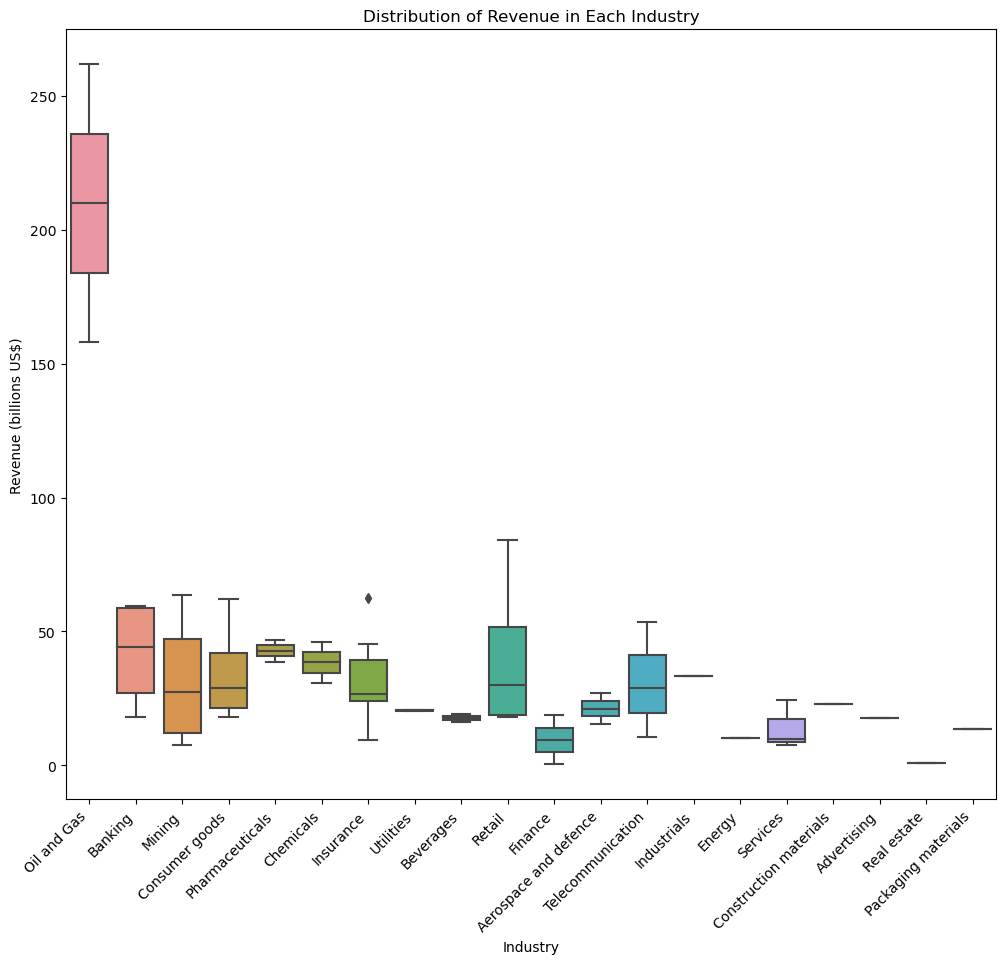

In [171]:
# Box pot of revenue per industry to show distribution and outliers 
plt.figure(figsize=(12, 10))
sns.boxplot(x='Industry', y='Revenue(billions US$)', data=company_data)

plt.title('Distribution of Revenue in Each Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue (billions US$)')

plt.xticks(rotation=45, ha='right')
plt.show()

In [172]:
#showing revenue by industry by itself
total_revenue_by_industry = company_data.groupby('Industry')['Revenue(billions US$)'].sum().reset_index()
total_revenue_by_industry

,Industry,Revenue(billions US$)
0,Advertising,17.61
1,Aerospace and defence,42.28
2,Banking,165.84
3,Beverages,35.24
4,Chemicals,76.94
5,Construction materials,22.74
6,Consumer goods,138.18
7,Energy,10.33
8,Finance,28.48
9,Industrials,33.43


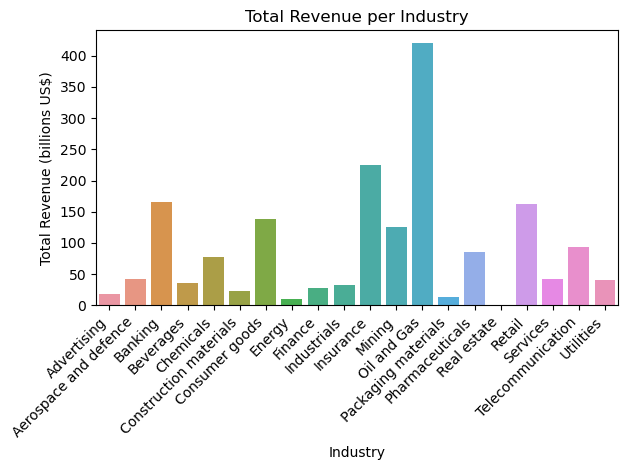

In [173]:
#Bar chart to show distribution of total revenue per industry
sns.barplot(x='Industry', y='Revenue(billions US$)', data=total_revenue_by_industry)

plt.title('Total Revenue per Industry', fontsize=12)
plt.xlabel('Industry', fontsize=10)
plt.ylabel('Total Revenue (billions US$)', fontsize=10)

# Rotate labels so they fit and are readable
plt.xticks(rotation=45, ha='right')

# Adjust figure and prevent cut-off labels
plt.tight_layout()

plt.show()

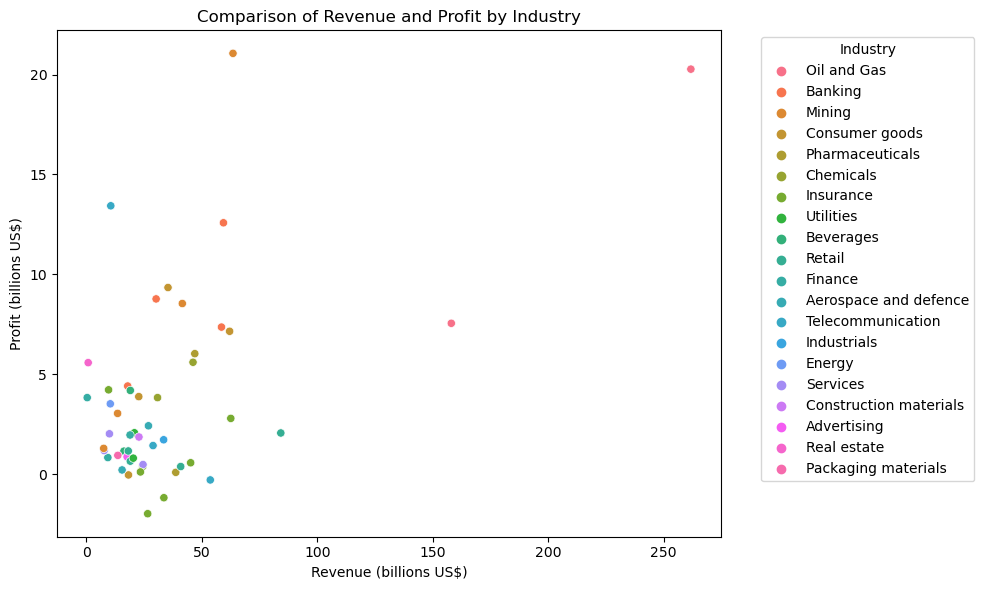

In [174]:
# Create a scatter plot to compare Revenue to Profits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue(billions US$)', y='Profit(billions US$)', data=company_data, hue='Industry')

plt.title('Comparison of Revenue and Profit by Industry')
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Profit (billions US$)')

# Legend
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


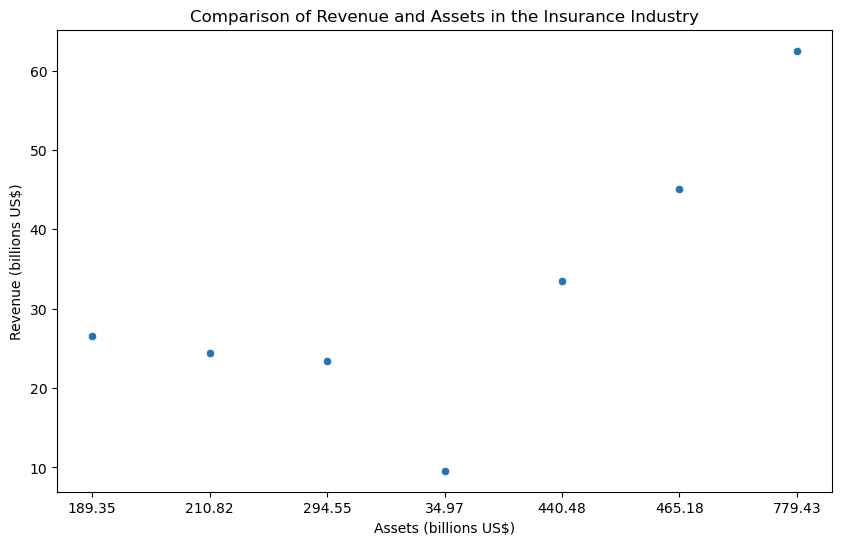

In [186]:
insurance_data = company_data[company_data['Industry'] == 'Insurance']

insurance_data = insurance_data.sort_values('Assets(billions US$)', ascending=True)


# Now create a scatter plot comparing Revenue to Assets for the Insurance industry
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='Assets(billions US$)', y='Revenue(billions US$)')

#sorting data based on assets so x-axis is in ascending order 
insurance_data_sorted = insurance_data.sort_values(by='Assets(billions US$)')

plt.title('Comparison of Revenue and Assets in the Insurance Industry')
plt.xlabel('Assets (billions US$)')
plt.ylabel('Revenue (billions US$)')
plt.show()

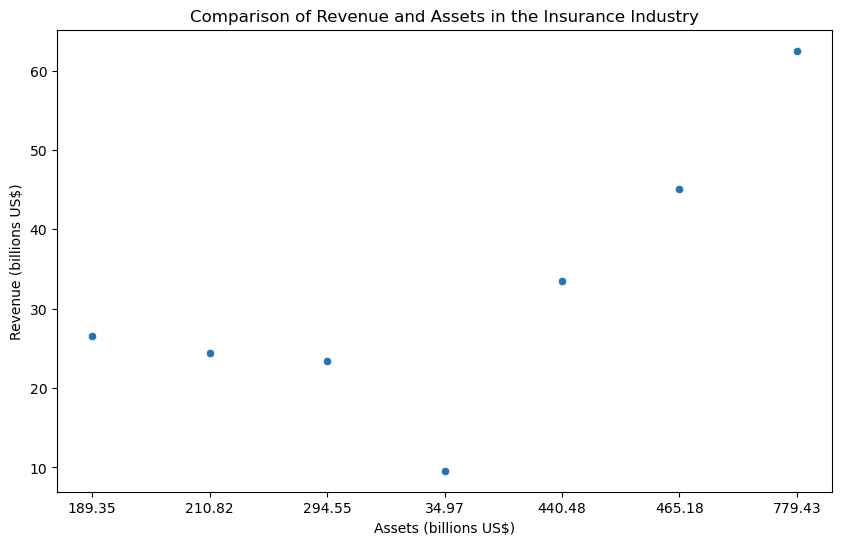

In [187]:
insurance_data = company_data[company_data['Industry'] == 'Insurance']

# Sort the data based on 'Assets(billions US$)' in ascending order
insurance_data_sorted = insurance_data.sort_values('Assets(billions US$)', ascending=True)

# Create a scatter plot comparing Revenue to Assets for the Insurance industry
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data_sorted, x='Assets(billions US$)', y='Revenue(billions US$)')

# Set plot titles and labels
plt.title('Comparison of Revenue and Assets in the Insurance Industry')
plt.xlabel('Assets (billions US$)')
plt.ylabel('Revenue (billions US$)')

# Show the plot
plt.show()


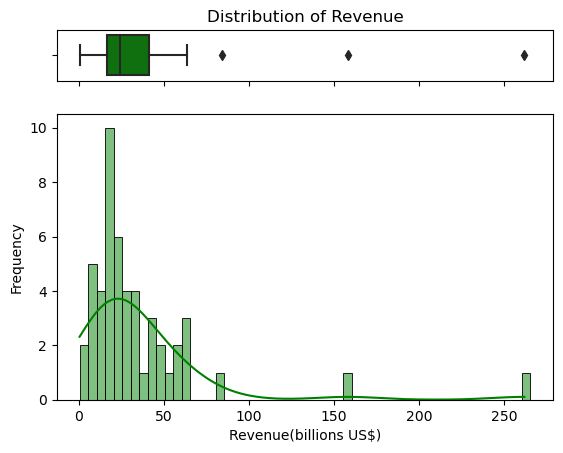

In [181]:
# Create 2 subplots with a shared x-axis
fig, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)}, sharex=True)

sns.boxplot(x=company_data['Revenue(billions US$)'], ax=ax_box, color='green')
sns.histplot(company_data['Revenue(billions US$)'], binwidth=5, kde=True, color='green', ax=ax_hist)

ax_box.set(title='Distribution of Revenue', xlabel='')
ax_box.set(xlabel='Revenue (billions US$)')
ax_hist.set(ylabel='Frequency')
ax_box.set(xlabel='')
plt.show()


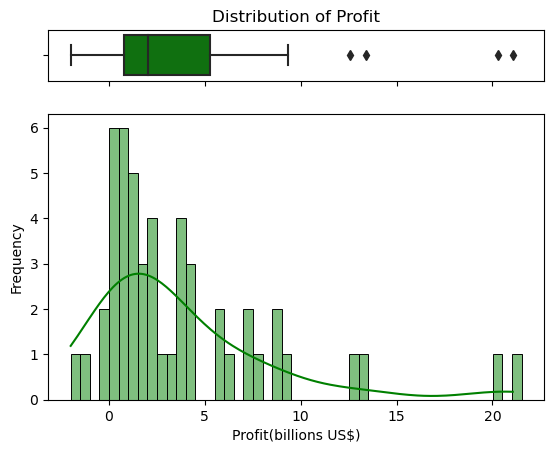

In [185]:
# Create 2 subplots with a shared x-axis
fig, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)}, sharex=True)

sns.boxplot(x=company_data['Profit(billions US$)'], ax=ax_box, color='green')
sns.histplot(company_data['Profit(billions US$)'], binwidth=0.5, kde=True, color='green', ax=ax_hist)

ax_box.set(title='Distribution of Profit', xlabel='')
ax_box.set(xlabel='Profit (billions US$)')
ax_hist.set(ylabel='Frequency')
ax_box.set(xlabel='')
plt.show()

In [196]:
summary_stats = company_data[['Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)']].describe()
summary_stats

,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$)
count,50.000000,50.000000,50.000000,50.000000
mean,35.601000,3.802400,279.144000,47.699000
std,41.677187,4.830091,541.189405,50.209713
min,0.330000,-1.980000,9.850000,1.520000
25%,16.582500,0.807500,33.465000,17.877500
50%,23.900000,2.040000,57.700000,26.665000
75%,41.345000,5.287500,205.452500,55.982500
max,261.760000,21.060000,2957.940000,211.100000
